In [ ]:
***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv(r'dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [5]:
classes = [0, 1576, 3152, 7880, 15760, 20000]


### 2º Definir os labels das classes

In [6]:
label = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [7]:
freq_renda = pd.cut(x=dados.Renda,
                    bins = classes,
                    labels = label,
                    include_lowest = True )

freq_renda = freq_renda.value_counts()
freq_renda

Renda
E    49755
D    16700
C     7599
B     2178
A      349
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [8]:
perc_renda = pd.cut(x=dados.Renda,
                    bins = classes,
                    labels = label,
                    include_lowest = True )

perc_renda = perc_renda.value_counts(normalize=True)
perc_renda

Renda
E    0.649704
D    0.218070
C    0.099228
B    0.028440
A    0.004557
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [9]:
renda = pd.DataFrame({'Frequência': freq_renda, 'Porcentagem (%)':perc_renda})
renda

,Frequência,Porcentagem (%)
Renda,,
E,49755,0.649704
D,16700,0.218070
C,7599,0.099228
B,2178,0.028440
A,349,0.004557


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

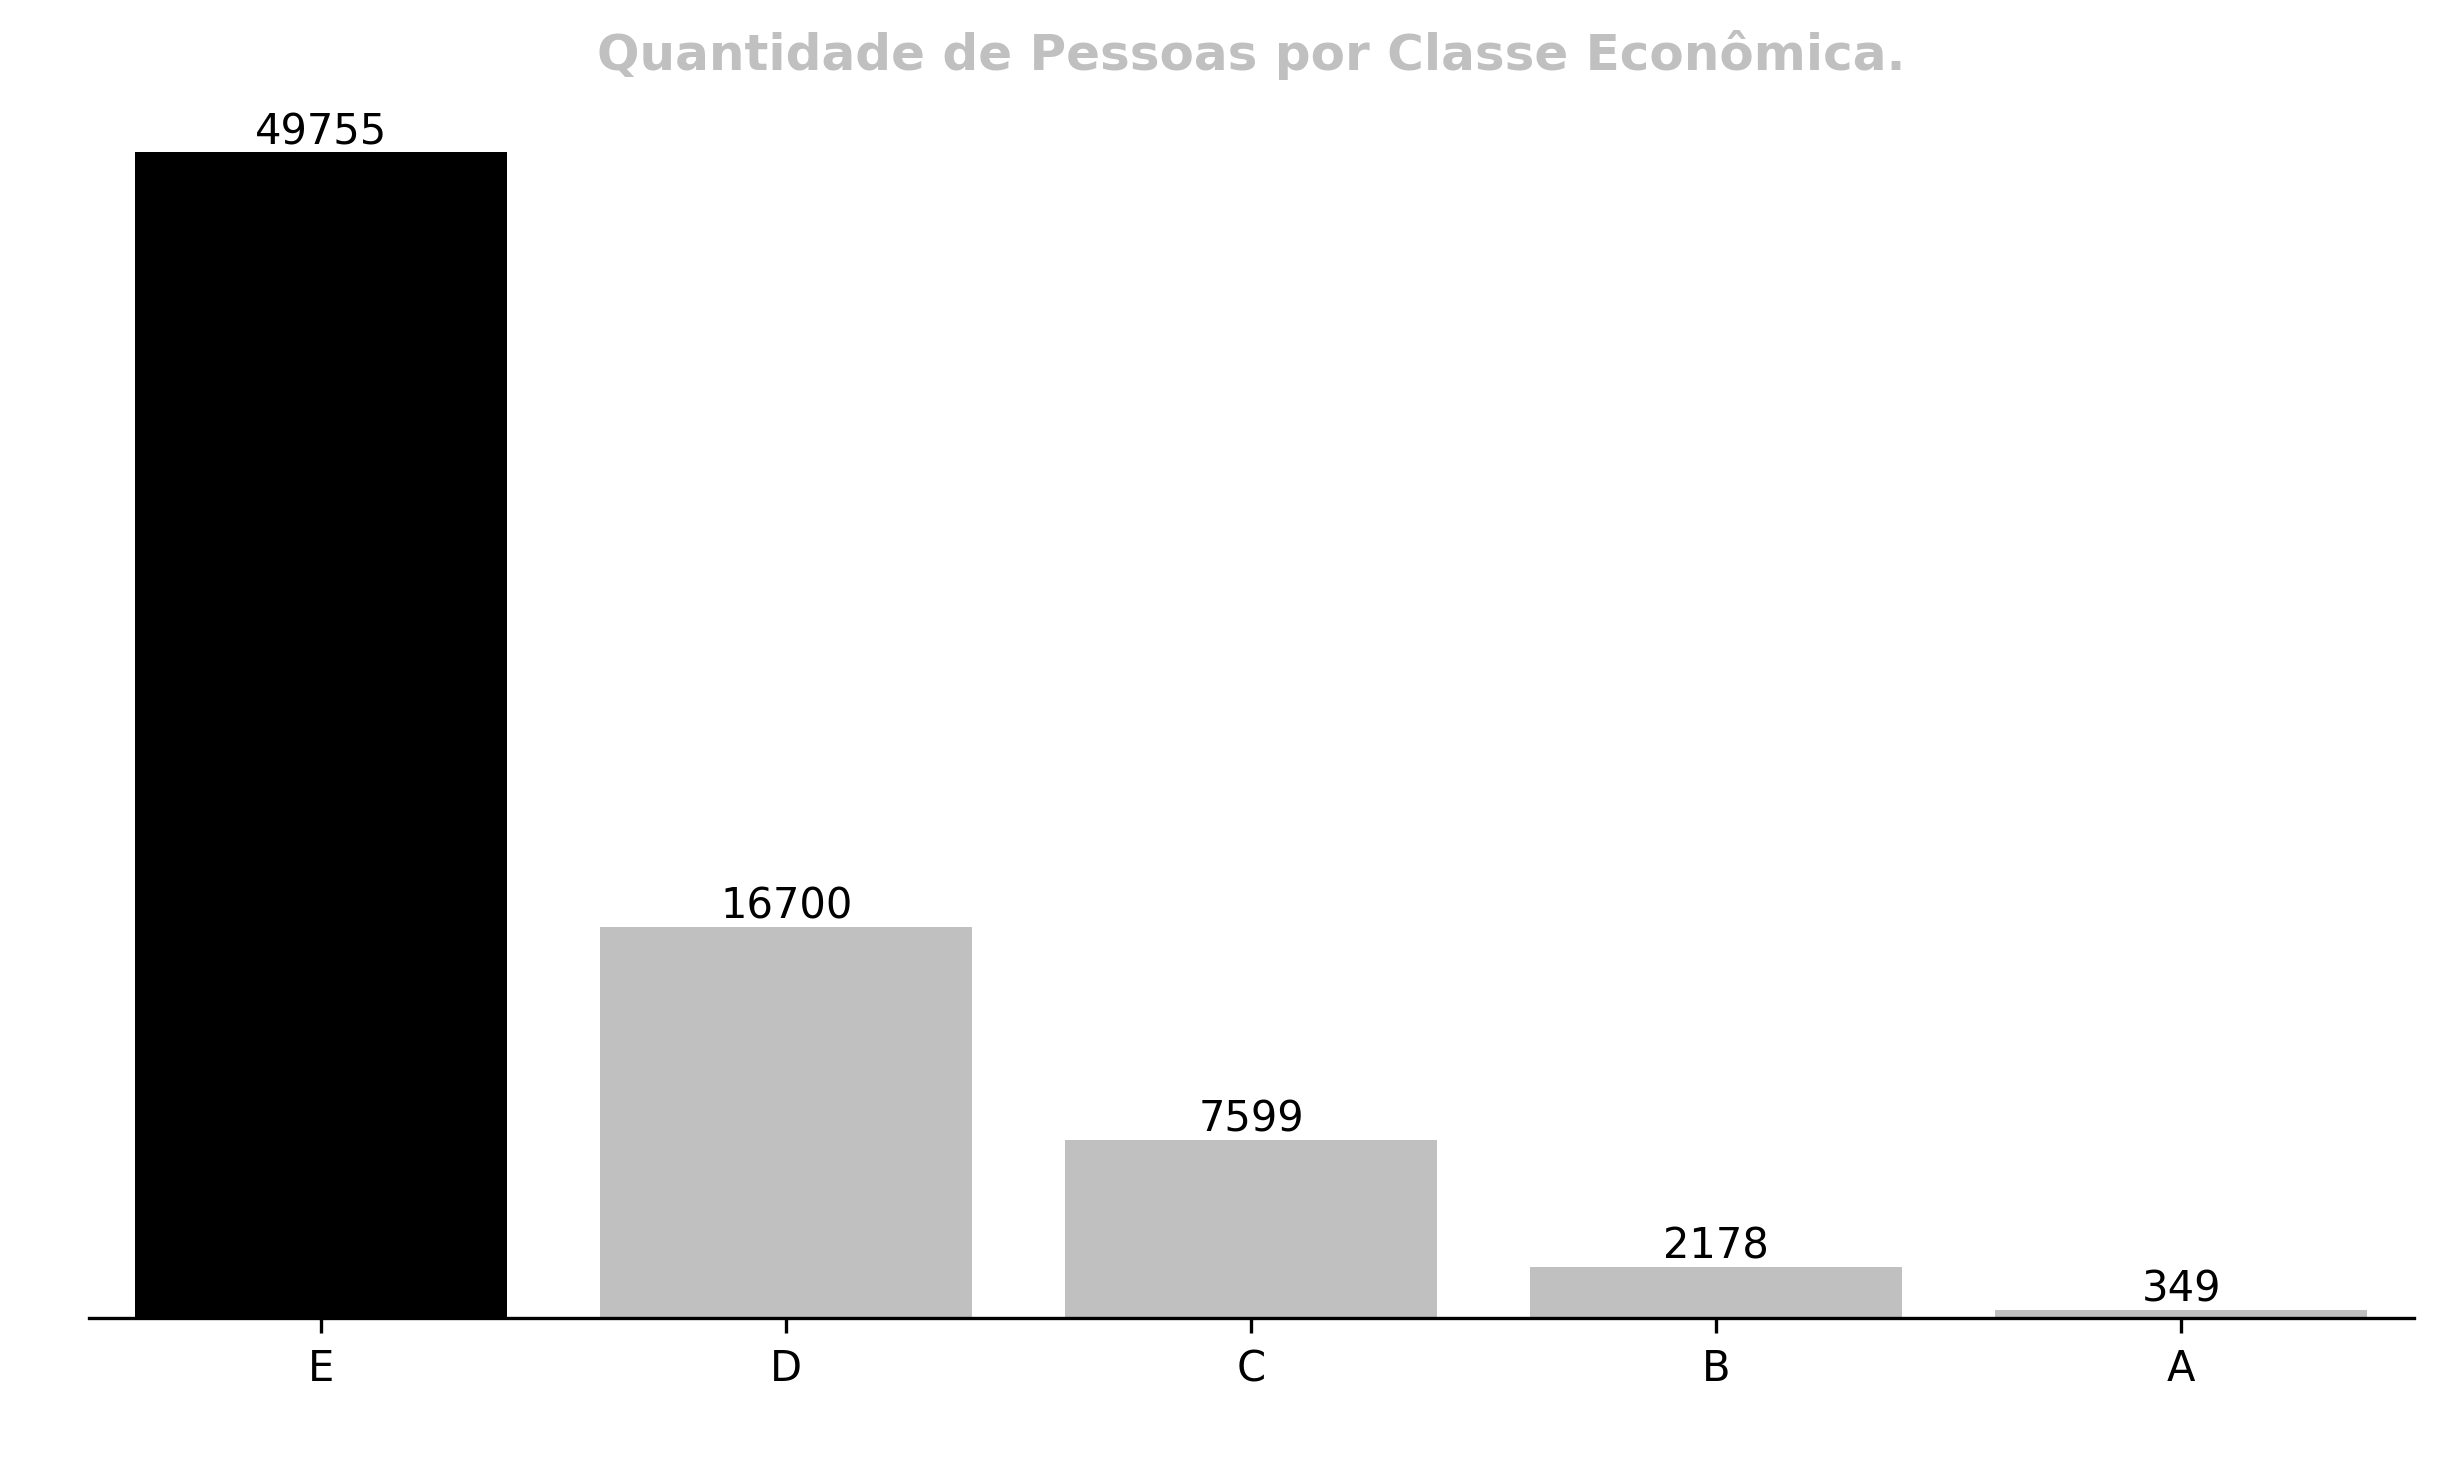

In [10]:
cinza = '#C0C0C0'

fig = plt.figure(figsize=(10, 6), dpi=300)
ax = sns.barplot(renda.Frequência, color=cinza)
# Definindo a cor da primeira coluna para preto
ax.patches[0].set_facecolor('black')
ax.set_title('Quantidade de Pessoas por Classe Econômica.',fontweight="bold", color=cinza)

ax.set_ylabel(' ')
ax.set_xlabel(' ')
ax.set_yticklabels([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.subplots_adjust(bottom=0.2)

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f'{y:.0f}', ha='center', va='bottom')


> ### Conclusões

Cerca de 65% dos respondentes estão concentrados na classe E, recebendo mensalmente entre 0 a 2 salários mínimos.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

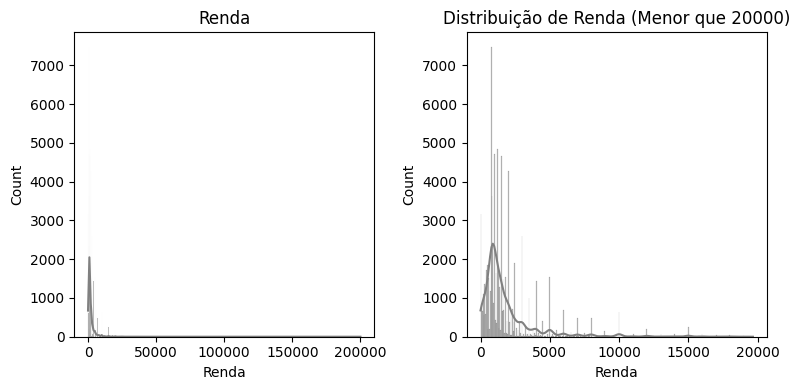

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(dados.Renda, kde=True, ax=axs[0], color='grey')
axs[0].set_title('Renda')

sns.histplot(dados.query('Renda < 20000').Renda, kde=True, ax=axs[1], color='grey')
axs[1].set_title('Distribuição de Renda (Menor que 20000)')

plt.tight_layout()
plt.show()

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'wspace': 0, 'hspace': 0})

sns.histplot(dados.Renda, kde=True, ax=axs[0],font, color=cinza)
axs[0].set_title('Distribuição da Renda', color=cinza)
axs[0].set_ylabel('Quantidade')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)

sns.histplot(dados.query('Renda < 20000').Renda, kde=True, ax=axs[1], color='grey')
axs[1].set_title('Distribuição da Renda (< 20000)')
axs[1].set_ylabel('Quantidade')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_yticks([])  # Remove os marcadores do eixo Y

plt.tight_layout()
plt.show()

SyntaxError: positional argument follows keyword argument (458269674.py, line 3)

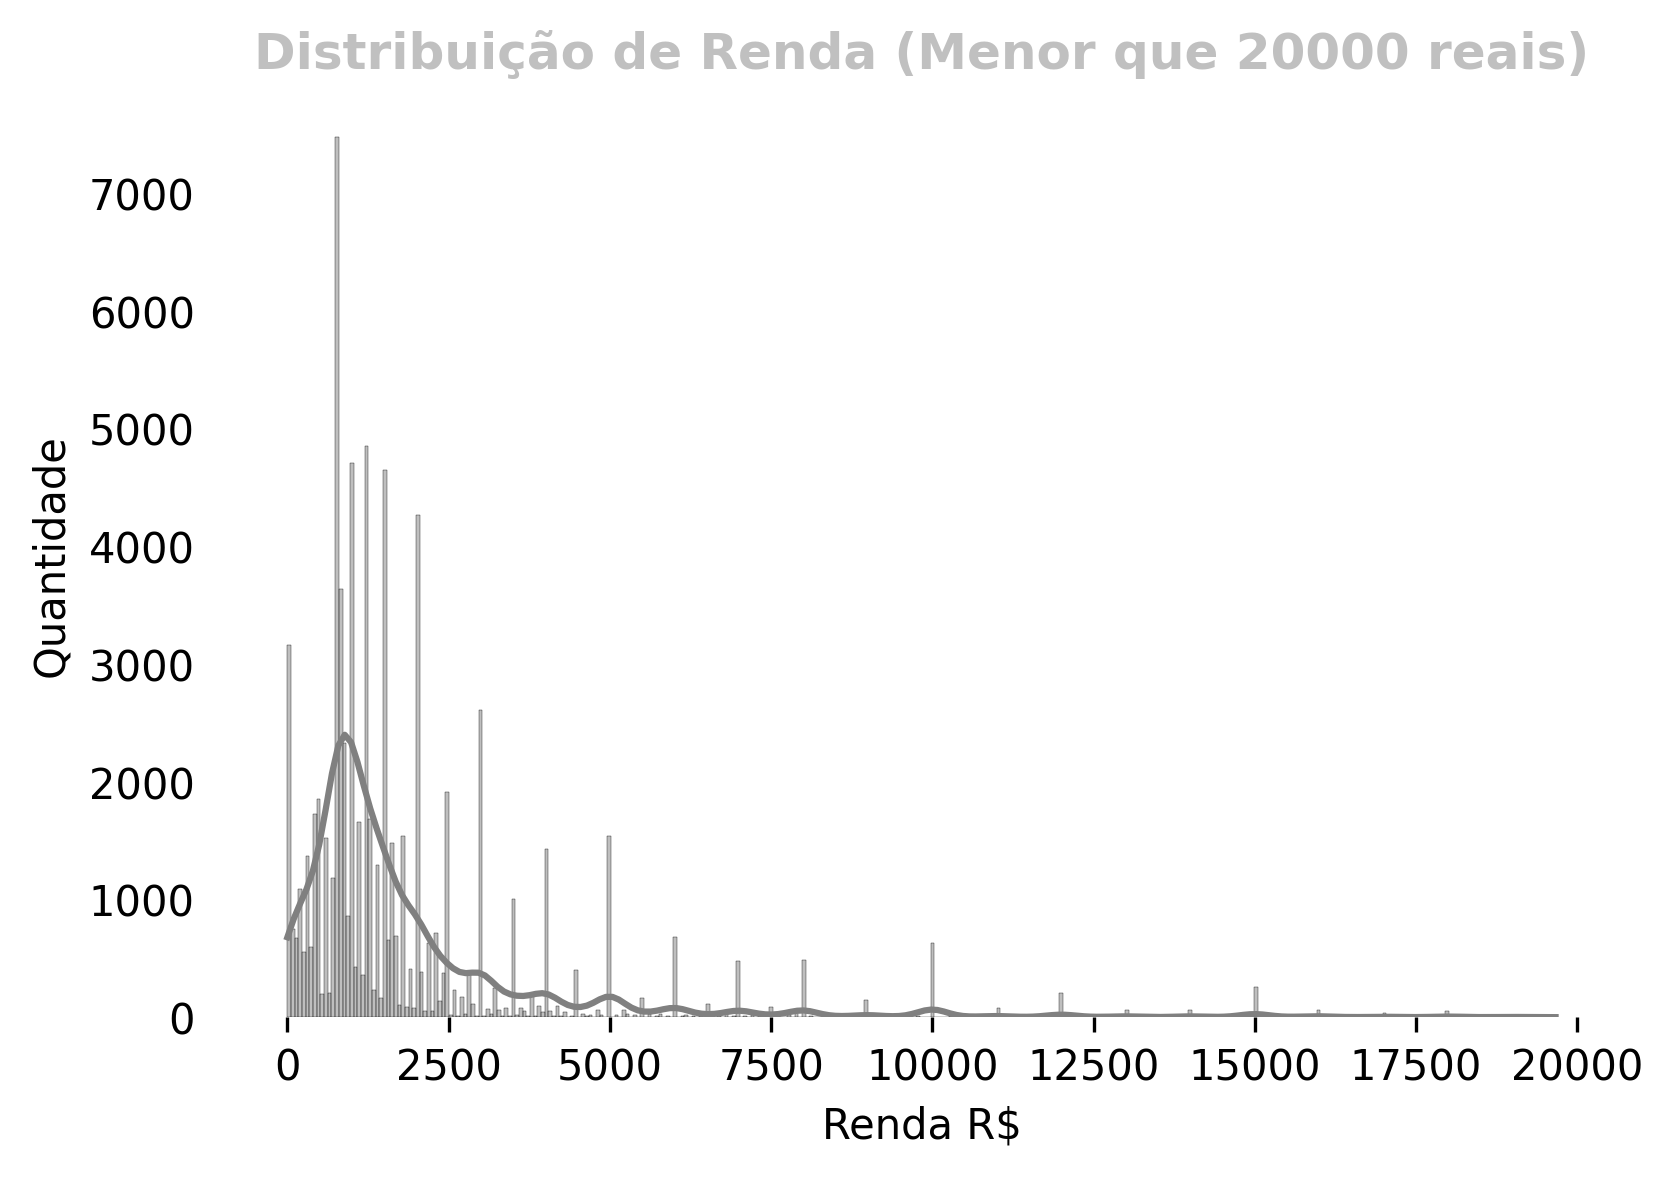

In [ ]:
plt.figure(figsize=(6, 4),dpi=300)

sns.histplot(dados.query('Renda < 20000').Renda, kde=True, color='grey')
plt.title('Distribuição de Renda (Menor que 20000 reais)', fontweight='bold', color=cinza)
plt.xlabel('Renda R$')
plt.ylabel('Quantidade')
plt.tick_params(axis='y', which='both', left=False)  # Remover marcadores do eixo Y

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

Observo que a distribuição de renda apresenta assimetria à direita, o que se deve ao fato de que cerca de 85% dos respondentes da PNAD possuem uma renda média mensal inferior a 5 salários mínimos. Vale ressaltar que os respondentes da classe A representam uma parcela muito pequena do conjunto de dados, o que dificulta a visualização no histograma. Por isso, fiz uma comparação entre os histogramas com todo o conjunto de dados e outro com um recorte para renda média mensal inferior a 20.000 reais (classe D).

Text(0.5, 1.0, 'Distribuição da Altura.')

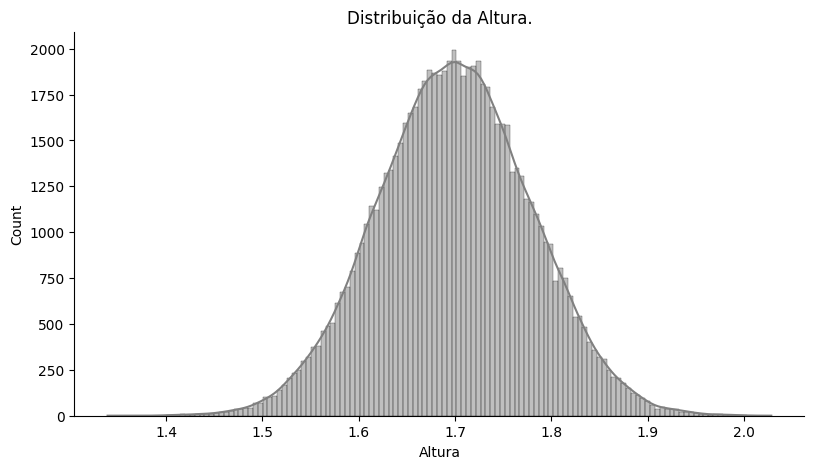

In [ ]:
ax = sns.displot(dados.Altura, kde=True, color='grey')
ax.figure.set_size_inches(9,4.5)
plt.title('Distribuição da Altura.')

A distribuição das alturas se comportam com uma distribuição normal.

Text(0.5, 1.0, 'Distribuição dos Anos de Estudos.')

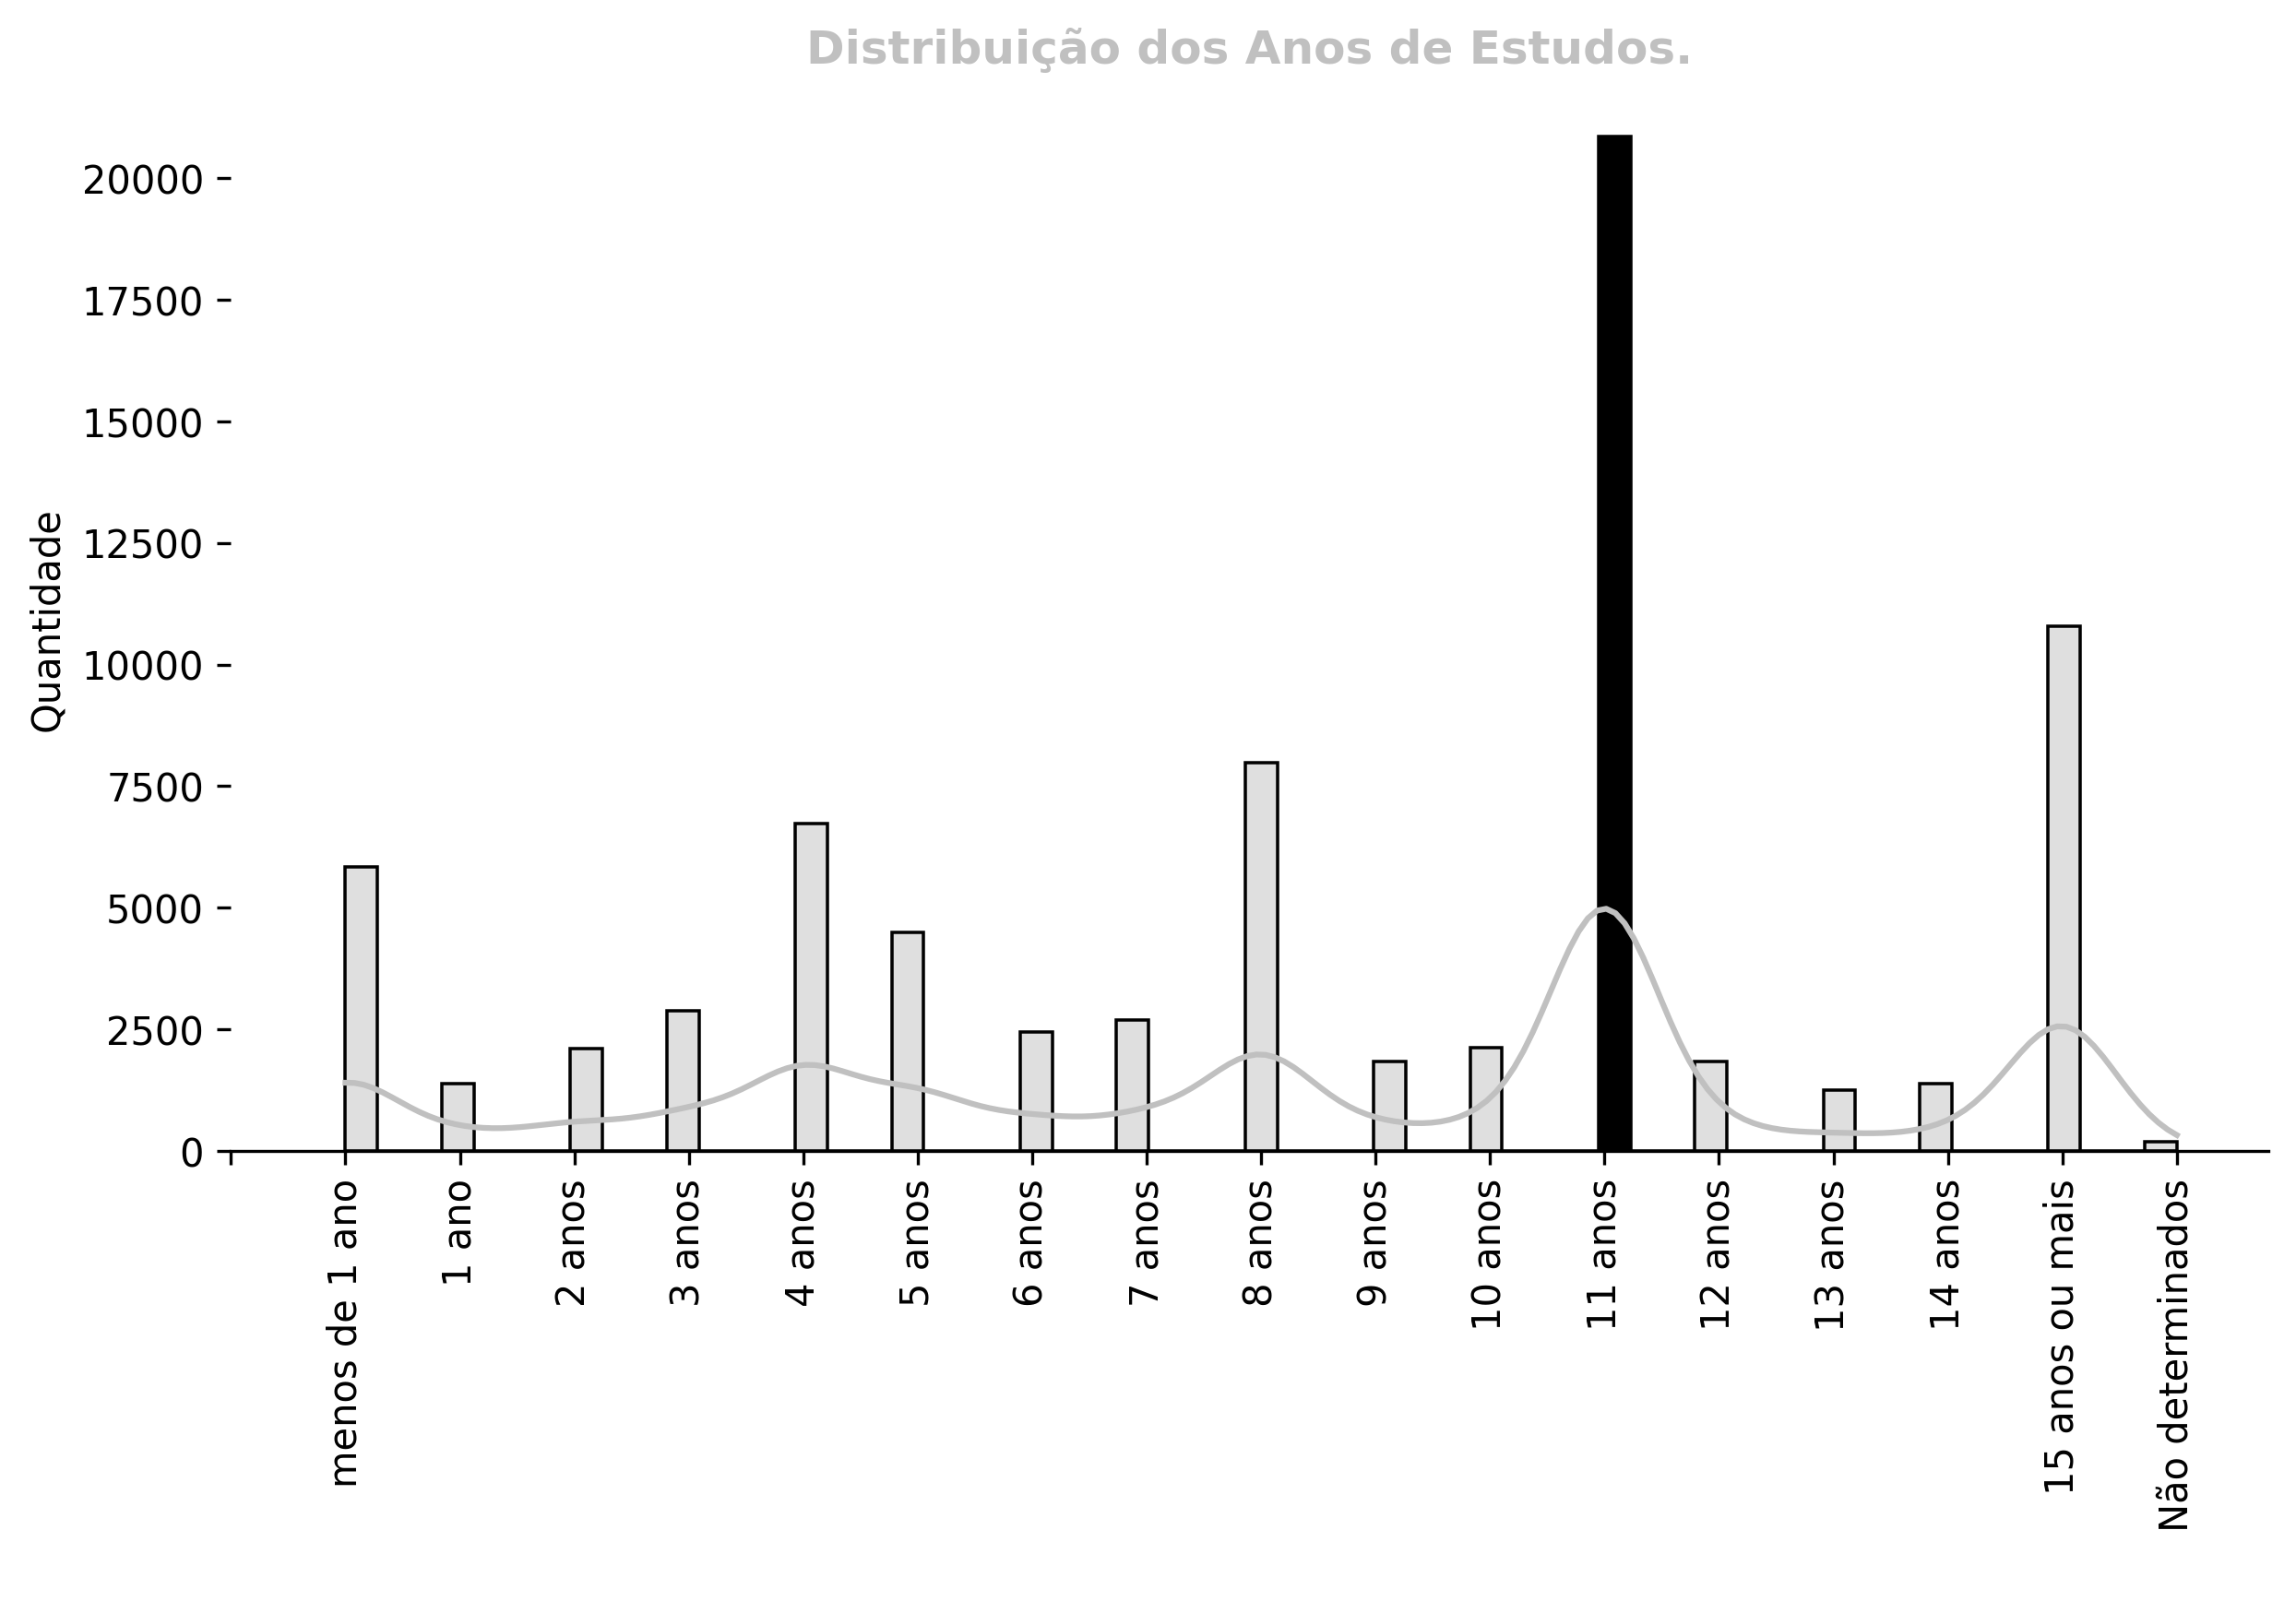

In [ ]:
anos_de_estudo = [' ',
    'menos de 1 ano', '1 ano', '2 anos', '3 anos', '4 anos',
    '5 anos', '6 anos', '7 anos', '8 anos', '9 anos', '10 anos', '11 anos',
    '12 anos', '13 anos', '14 anos', '15 anos ou mais', 'Não determinados'
]
plt.figure(figsize=(9.5,5),dpi=300)
ax = sns.histplot(dados['Anos de Estudo'],kde=True,color=cinza)

bars = ax.patches
bars[39].set_facecolor('black')


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.gca().spines['left'].set_visible(False)
plt.ylabel('Quantidade')
plt.xticks(ticks=range(len(anos_de_estudo)), labels=anos_de_estudo, rotation=90)
plt.xlabel(' ')
plt.title('Distribuição dos Anos de Estudos.', fontweight='bold', color=cinza)

In [ ]:
media = dados['Anos de Estudo'].mean()
mediana = dados['Anos de Estudo'].median()
moda = dados['Anos de Estudo'].mode()

print(f'{media} < {mediana} < {moda}')

9.469664237376367 < 11.0 < 0    12
Name: Anos de Estudo, dtype: int64


Os dados referentes aos anos de estudo exibem uma assimetria à esquerda, com a moda - o valor que mais se repete - sendo 11 anos de estudo. É importante destacar que, de acordo com o dicionário de dados, o valor 12 representa 11 anos de estudo. Essa assimetria é observada porque o tempo de estudo até a conclusão do ensino fundamental é de 11 anos, indicando que a maioria dos respondentes conclui seus estudos no nível fundamental.

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [ ]:
freq_cor = pd.crosstab(dados.Sexo, dados.Cor)
freq_cor = freq_cor.rename(index=sexo)
freq_cor = freq_cor.rename(columns=cor)
freq_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


> ### Conclusões

A maior parte do conjunto de dados é composta por pessoas brancas e pardas.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
media = dados.Renda.mean()
media

2000.3831988547631

### Obtenha a mediana

In [ ]:
mediana = dados.Renda.median()
mediana

1200.0

### Obtenha a moda

In [ ]:
moda = dados.Renda.mode()
moda

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [ ]:
dma = np.mean(np.abs(np.array(dados.Renda) - np.mean(dados.Renda)))
dma

1526.4951371638058

### Obtenha a variância

In [ ]:
var = np.var(dados.Renda)
var

11044762.267200803

### Obtenha o desvio-padrão

In [ ]:
std = np.std(dados.Renda)
std

3323.366104900392

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
freq_cor = pd.crosstab(dados.Sexo, dados.Cor,aggfunc='mean', values=dados.Renda)
freq_cor = freq_cor.rename(index=sexo)
freq_cor = freq_cor.rename(columns=cor)
freq_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [ ]:
freq_cor = pd.crosstab(dados.Sexo, dados.Cor,aggfunc='median', values=dados.Renda)
freq_cor = freq_cor.rename(index=sexo)
freq_cor = freq_cor.rename(columns=cor)
freq_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,797.5,1700.0,1200.0,2800.0,1200.0
Feminino,788.0,1200.0,800.0,1500.0,800.0


In [ ]:
freq_cor = pd.crosstab(dados.Sexo, dados.Cor,aggfunc='max', values=dados.Renda)
freq_cor = freq_cor.rename(index=sexo)
freq_cor = freq_cor.rename(columns=cor)
freq_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


> ### Conclusões

Há uma variação significativa de renda entre os gêneros e as diferentes raças/cor. Com exceção dos indígenas, os homens tendem a ter uma renda mensal maior do que as mulheres. As pessoas de cor amarela têm a maior renda média mensal, seguidas pelas pessoas brancas, pardas, pretas e indígenas.

Ao analisar o valor máximo de renda em cada categoria, nota-se que a maior renda entre as mulheres é observada entre as indígenas. Isso influencia o aumento da média, já que a moda representa um valor bem mais baixo do que a média.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
freq_cor = pd.crosstab(dados.Sexo, dados.Cor,aggfunc='var', values=dados.Renda)
freq_cor = freq_cor.rename(index=sexo)
freq_cor = freq_cor.rename(columns=cor)
freq_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1.449841e+06,2.257002e+07,3.749294e+06,3.295707e+07,5.345747e+06
Feminino,1.429818e+08,1.056909e+07,1.821960e+06,1.392166e+07,2.547960e+06


In [ ]:
freq_cor = pd.crosstab(dados.Sexo, dados.Cor,aggfunc='std', values=dados.Renda)
freq_cor = freq_cor.rename(index=sexo)
freq_cor = freq_cor.rename(columns=cor)
freq_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1204.093490,4750.791872,1936.309271,5740.82482,2312.087184
Feminino,11957.498292,3251.013154,1349.799809,3731.17366,1596.233048


> ### Conclusões

Conforme mencionado anteriormente, a renda média das indígenas estava sendo influenciada pelo valor máximo. Isso pode ser observado pelo fato de que o maior desvio padrão é encontrado justamente nessa categoria.


### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

C:\Users\abraz\AppData\Local\Temp\ipykernel_11456\2192056780.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cor.values())


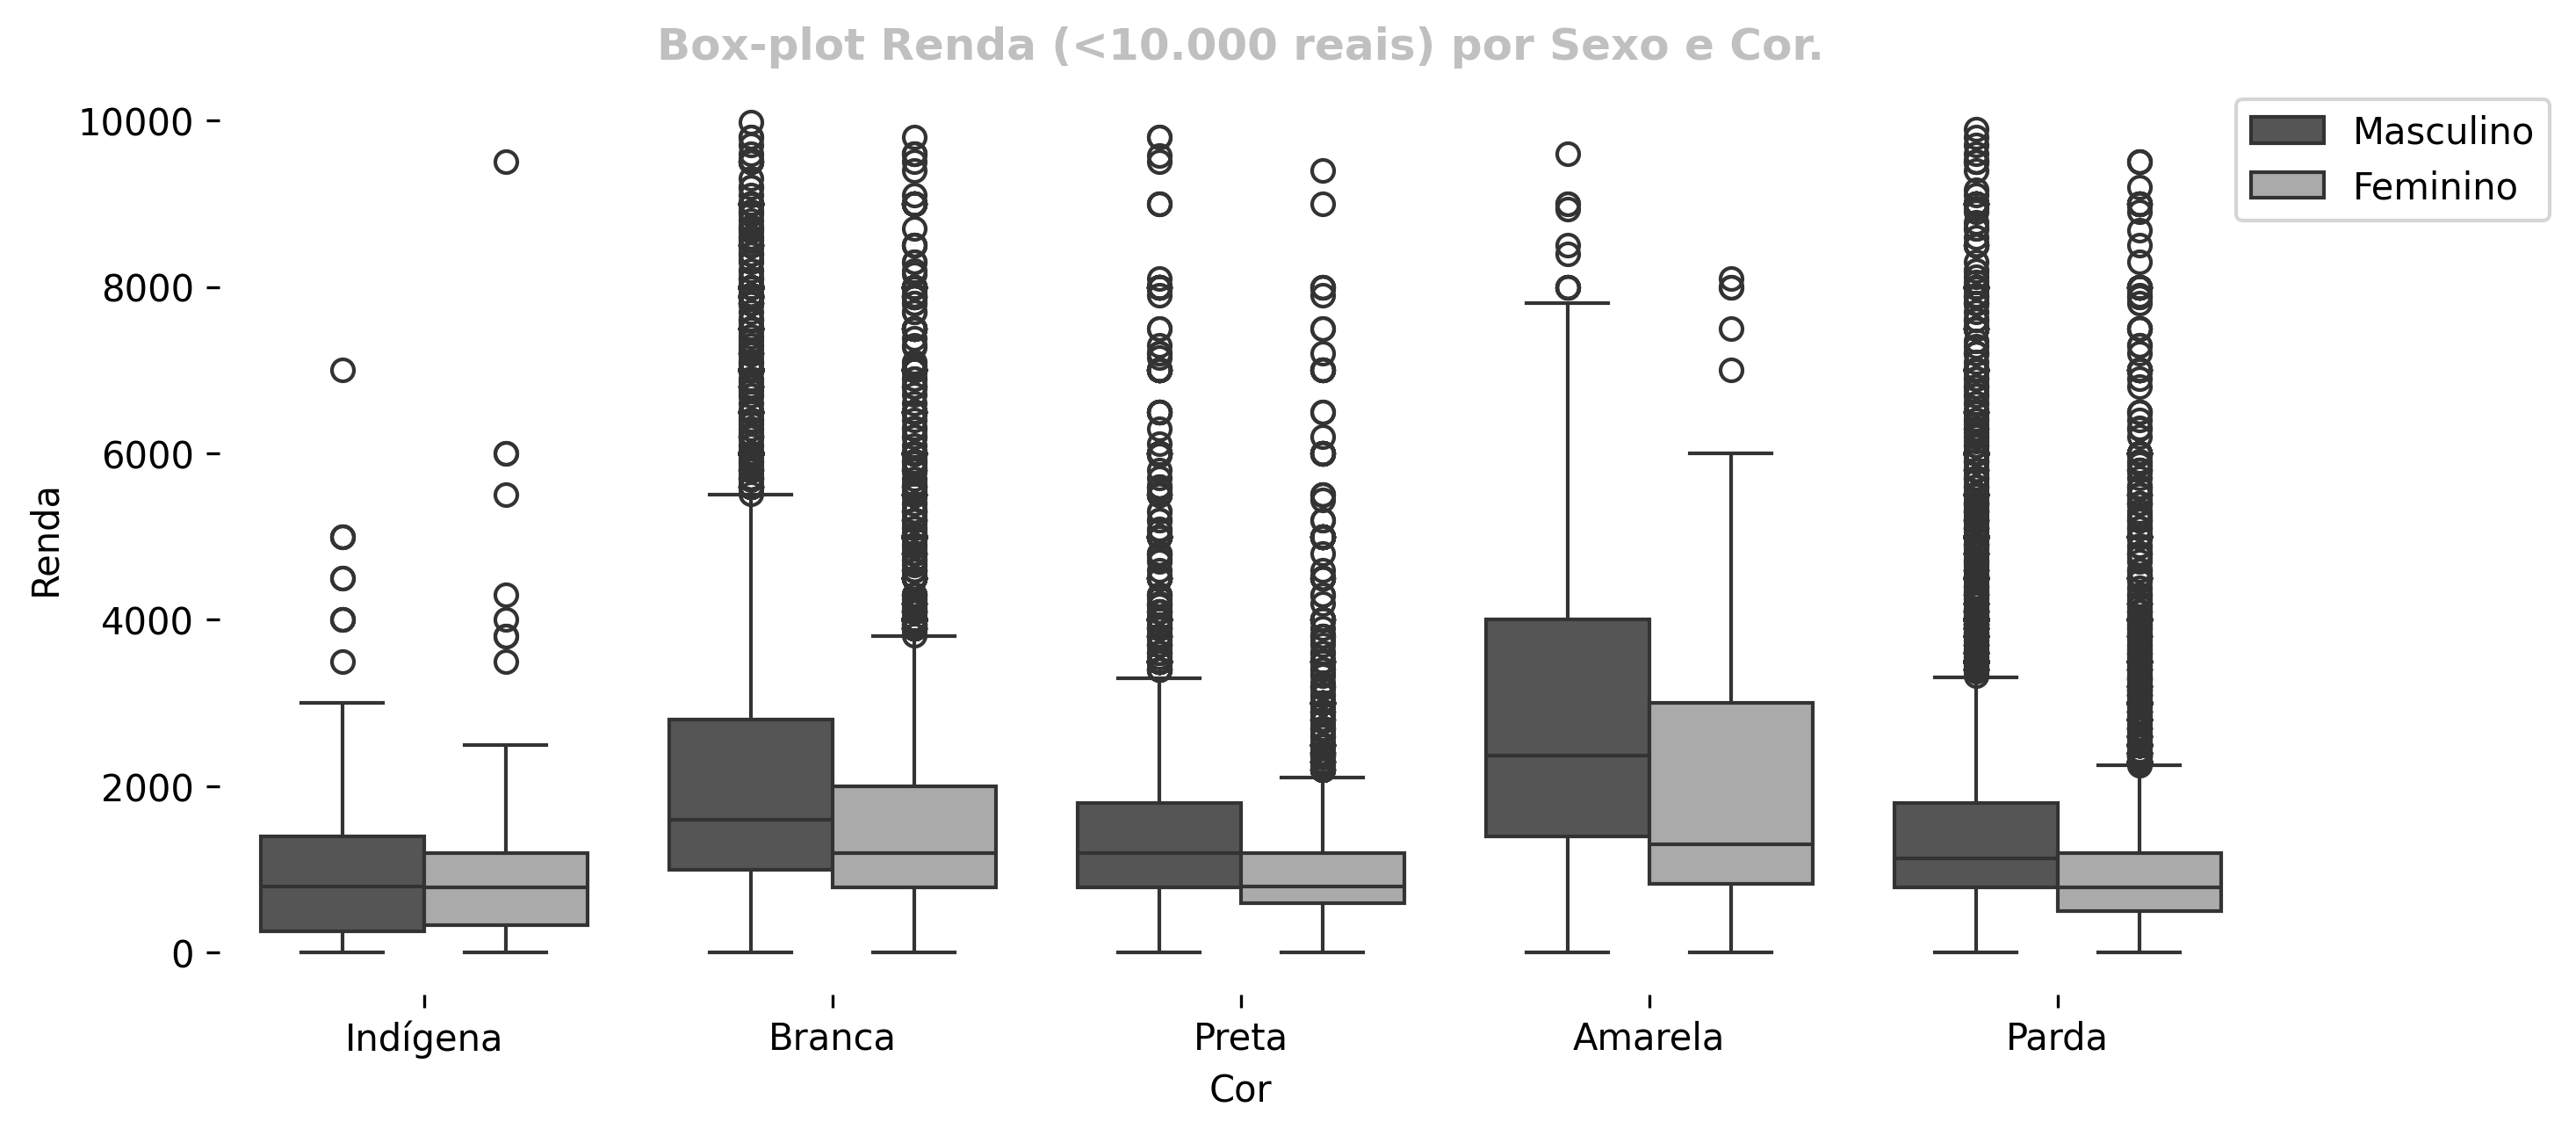

In [ ]:
plt.figure(dpi=300)
ax = sns.boxplot(y=dados.query('Renda < 10000').Renda, x=dados.Cor, hue=dados.Sexo, palette='grey')
ax.figure.set_size_inches(10, 4.5)
ax.set_xticklabels(cor.values())

handles, labels = ax.get_legend_handles_labels()
labels=sexo.values()
ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 1), facecolor='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title('Box-plot Renda (<10.000 reais) por Sexo e Cor.', fontweight='bold', color=cinza)
plt.show()

> ### Conclusões

Os boxplots revelam uma presença marcante de outliers nas categorias de cor/raça branca, preta e parda. Além disso, em todas as cores/etnias, é notável que a renda mensal dos indivíduos do sexo feminino é inferior à dos indivíduos do sexo masculino. A diferença na renda das pessoas de cor amarela em relação às outras cores/raças é notável. Há uma maior variação no intervalo de renda, no entanto, é perceptível que o segundo quartil começa muito próximo da mediana da renda das outras categorias.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats

percent = stats.percentileofscore(dados.Renda, 788, kind='weak')
print(f'{round(percent, 2)}%')

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
dados.Renda.quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
freq = pd.crosstab(dados['Anos de Estudo'],
                        dados.Sexo,
                        aggfunc= {'mean', 'median', 'max', 'std'},
                        values=dados.Renda).round(2)
                        
freq = freq.rename(columns=sexo)
freq = freq.rename(index=anos_de_estudo)
freq

max               mean           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano     30000    10000    799.49   516.20   
1 ano                              30000     2000    895.63   492.77   
2 anos                             40000     4000    931.18   529.91   
3 anos                             80000     3500   1109.20   546.85   
4 anos                             50000    10000   1302.33   704.28   
5 anos                             35000     8000   1338.65   781.39   
6 anos                             25000     6000   1448.88   833.73   
7 anos                             40000     9000   1465.50   830.75   
8 anos                             30000    18000   1639.40   933.62   
9 anos                             60000    20000   1508.04   868.02   
10 anos                            45000     6000   1731.27   925.92   
11 anos                           200000   100000   2117.06  1286.79   
12 anos                            30000   120000   2470.33  1682.31   
13 anos                            25000    20000   3195.10  1911.73   
14 anos                            50000    20000   3706.62  2226.46   
15 anos ou mais                   200000   100000   6134.28  3899.51   
Não determinados                    7000     3000   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

C:\Users\abraz\AppData\Local\Temp\ipykernel_11456\2197474668.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([i for i in anos_de_estudo.values()])


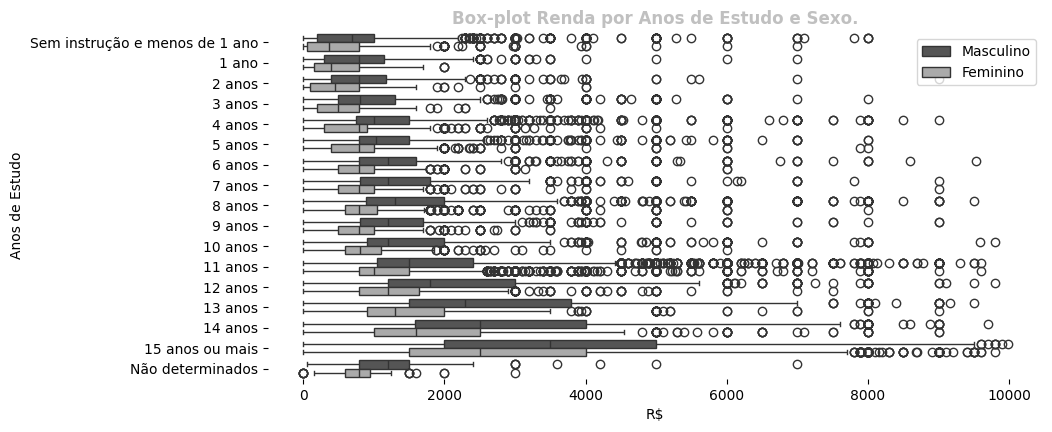

In [ ]:
ax = sns.boxplot(x=dados.query('Renda < 10000').Renda, y=dados['Anos de Estudo'], hue=dados.Sexo, palette='grey', orient='h')
ax.figure.set_size_inches(10, 4.5)


handles, labels = ax.get_legend_handles_labels()
labels=sexo.values()
ax.legend(handles, labels)
ax.set_xlabel('R$')
ax.set_yticklabels([i for i in anos_de_estudo.values()])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title('Box-plot Renda por Anos de Estudo e Sexo.', fontweight='bold', color=cinza)
plt.show()

C:\Users\abraz\AppData\Local\Temp\ipykernel_11456\98368198.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([i for i in anos_de_estudo.values()])


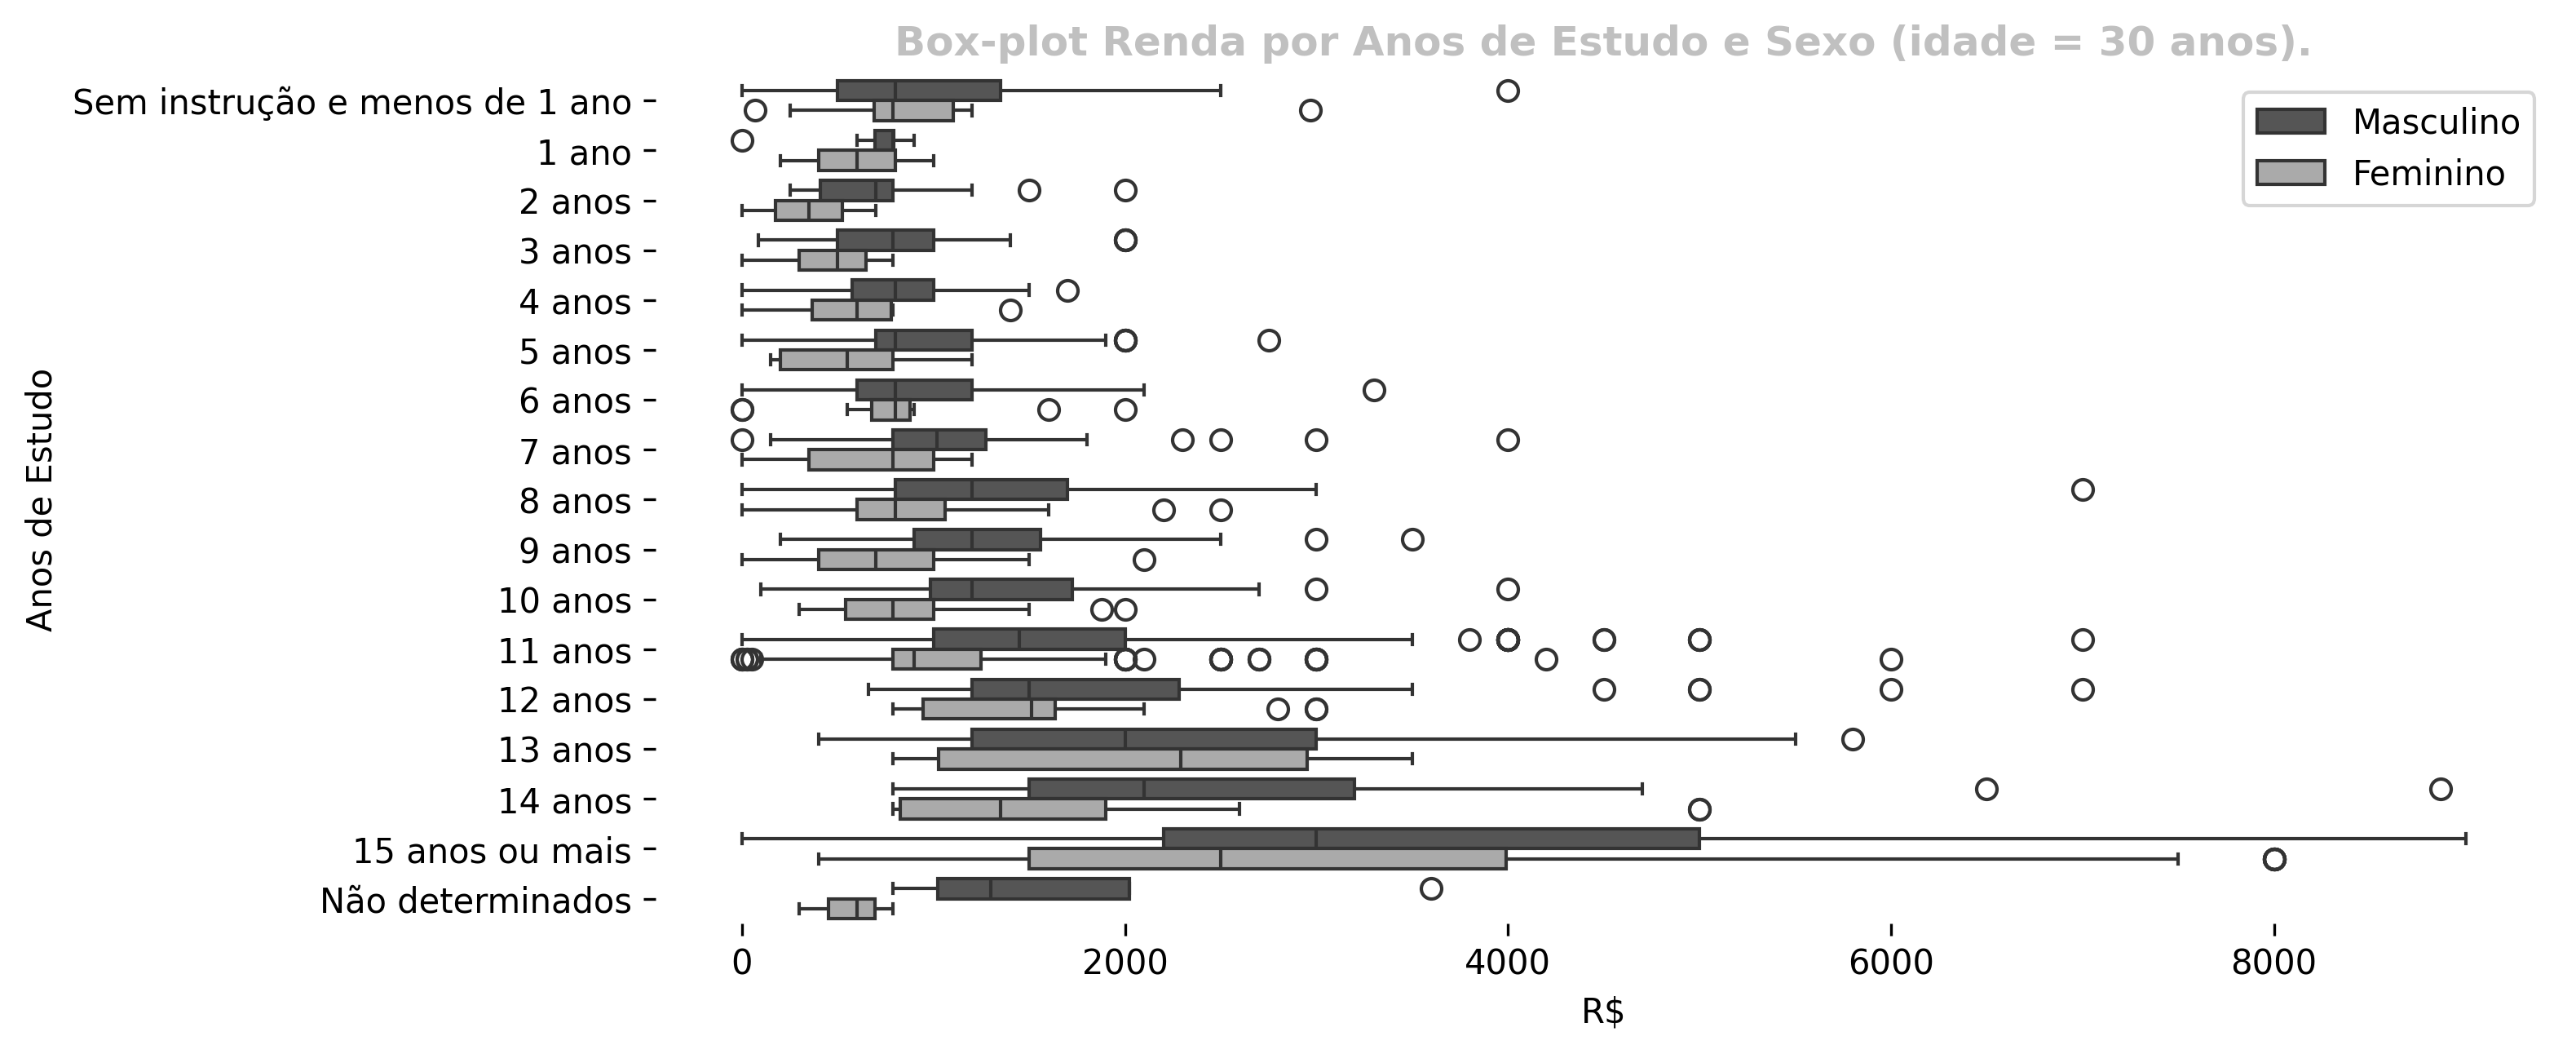

In [ ]:
plt.figure(dpi=300)
ax = sns.boxplot(x=dados.query('Renda < 10000 and Idade ==30').Renda, y=dados['Anos de Estudo'], hue=dados.Sexo, palette='grey', orient='h')
ax.figure.set_size_inches(10, 4.5)


handles, labels = ax.get_legend_handles_labels()
labels=sexo.values()
ax.legend(handles, labels)
ax.set_xlabel('R$')
ax.set_yticklabels([i for i in anos_de_estudo.values()])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title('Box-plot Renda por Anos de Estudo e Sexo (idade = 30 anos).', fontweight='bold', color=cinza)
plt.show()

> ### Conclusões

O gráfico apresentado ilustra os box-plots de renda em relação aos anos de estudo e sexo para indivíduos de 30 anos. É perceptível uma tendência ascendente entre a duração do estudo e a renda, indicando que aqueles com mais educação tendem a ter maiores rendimentos.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
renda_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_uf = renda_uf.rename(index=uf)
renda_uf

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

C:\Users\abraz\AppData\Local\Temp\ipykernel_11456\3478900176.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([i for i in uf.values()])


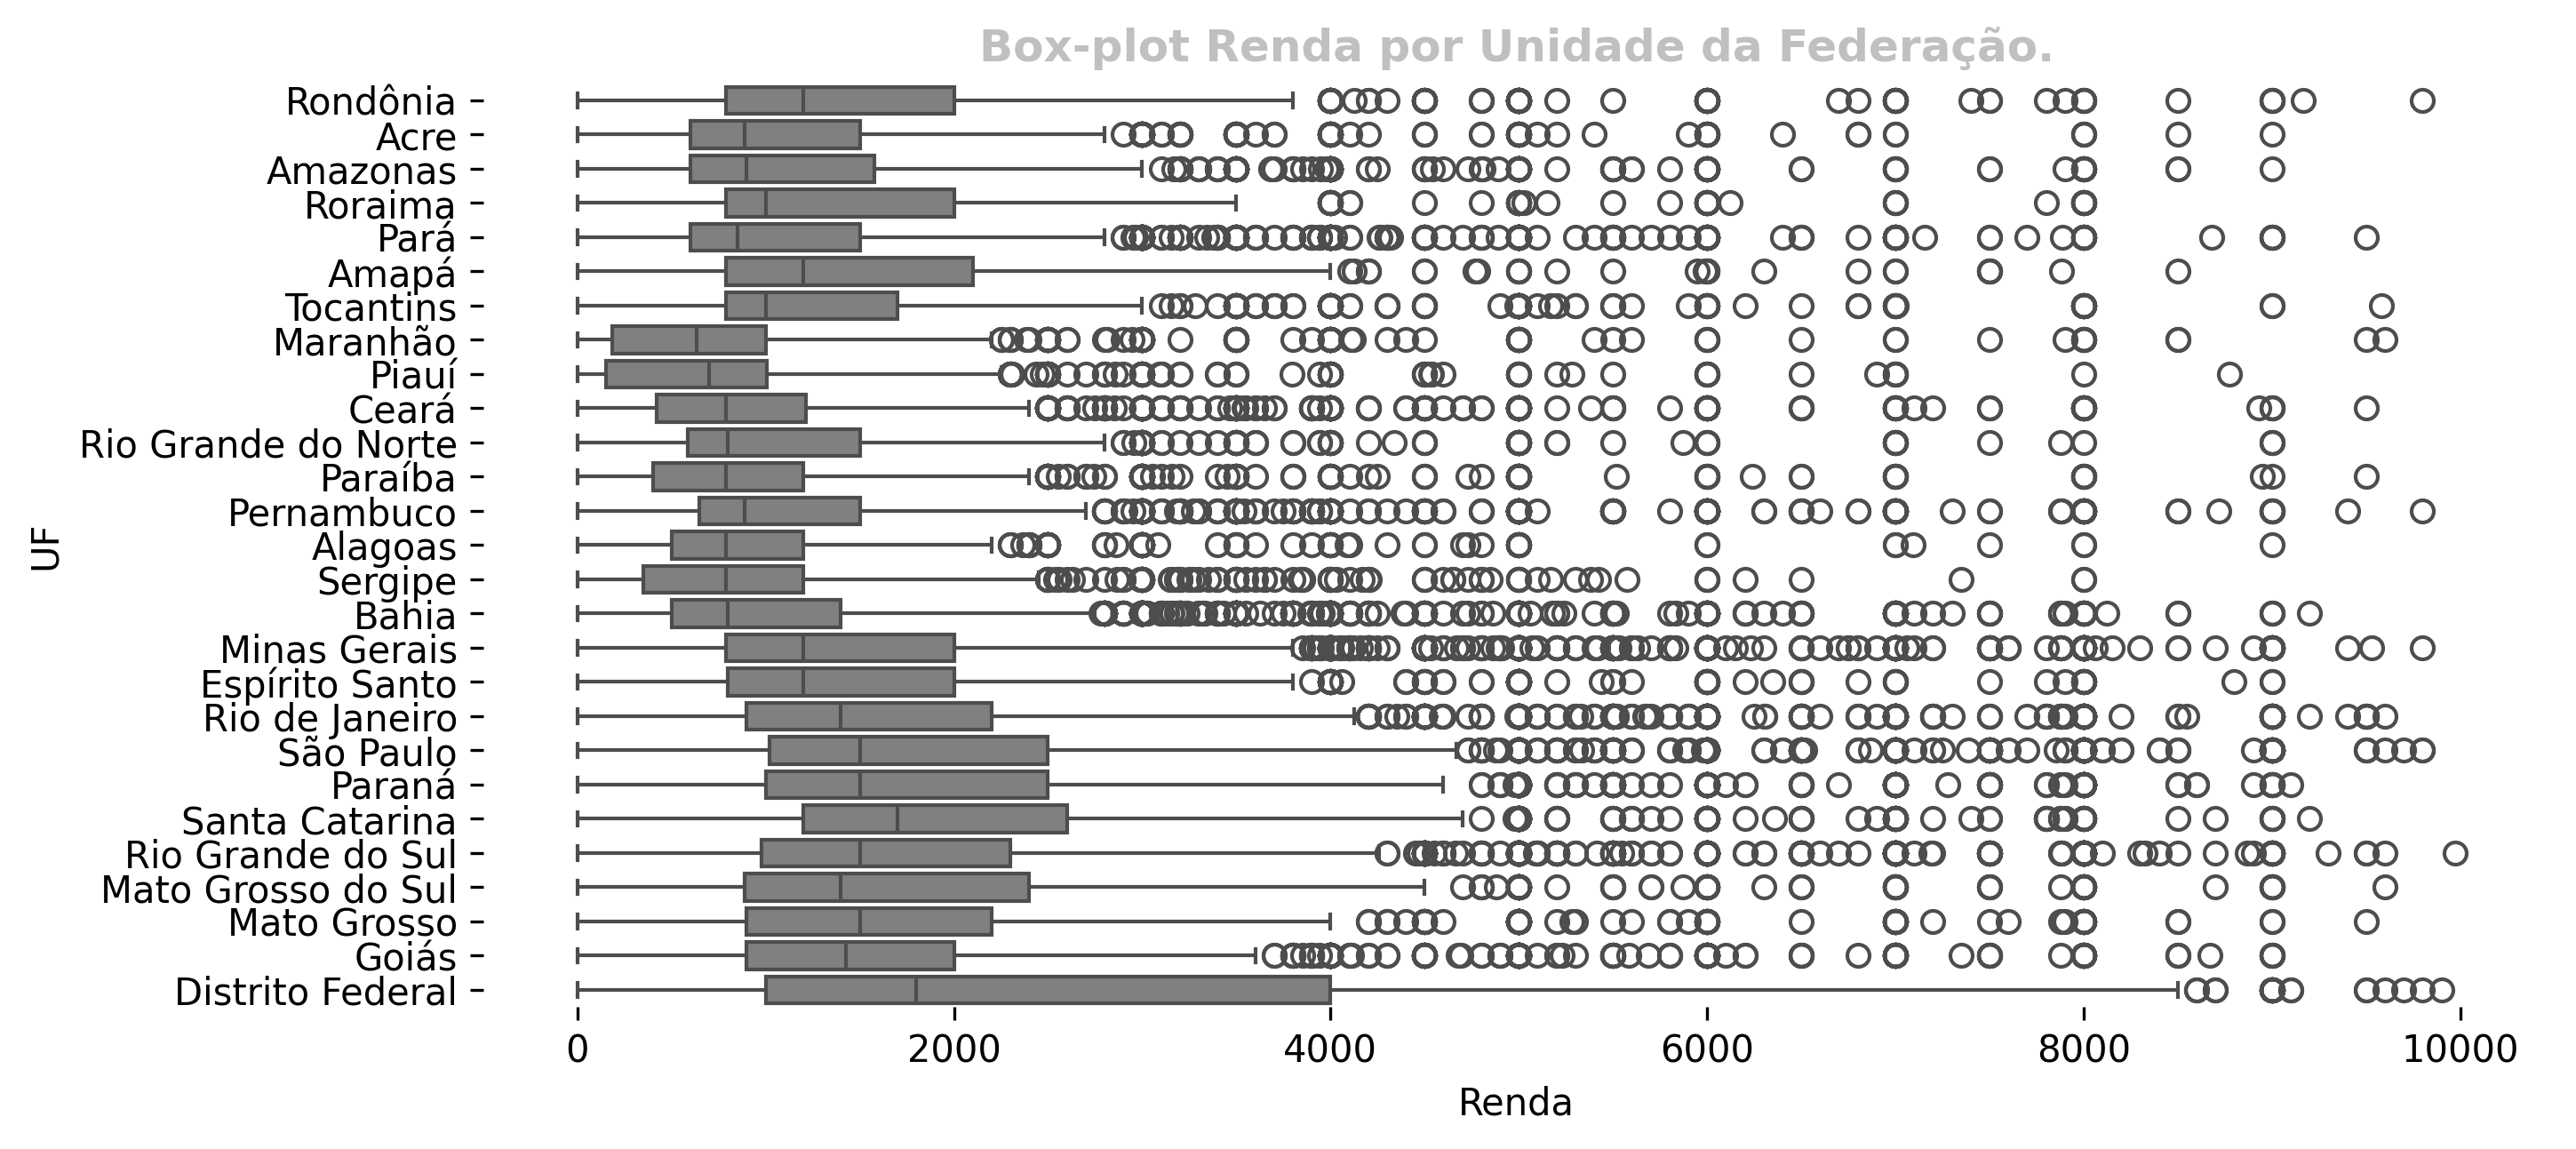

In [ ]:
plt.figure(dpi=300)
ax = sns.boxplot(x=dados.query('Renda < 10000').Renda, y=dados['UF'], color='grey', orient='h')
ax.figure.set_size_inches(10, 4.5)

ax.set_yticklabels([i for i in uf.values()])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title('Box-plot Renda por Unidade da Federação.', fontweight='bold', color=cinza)
plt.show()

> ### Conclusões

Nota-se que a renda por Unidade da Federação é bastante similar, com a ressalva de alguns estados do Nordeste que se encontram ligeiramente abaixo da média dos demais. O Distrito Federal se destaca notavelmente pelo seu terceiro quartil, demonstrando uma amplitude de renda consideravelmente superior à dos demais estados.